# Import Statements

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import cross_validation
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot    
import plotly.graph_objs as go
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.cross_validation import train_test_split
import keras

/home/user/Desktop/Stack/work/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


# Loading Data

In [7]:
white_wine = pd.read_csv("winequality-white.csv", sep=";",header=None)
red_wine = pd.read_csv("winequality-red.csv", sep=";",header=None)
red_wine.drop(red_wine.columns[0],axis=0,inplace=True)
white_wine.drop(white_wine.columns[0],axis=0,inplace=True)
red_white_wine = pd.DataFrame()
red_white_wine = pd.DataFrame(red_white_wine.append([white_wine,red_wine])).reset_index()

In [8]:
red_white_wine.drop(red_white_wine[['index']],axis=1,inplace=True)

# Fixing Hyper Parameters

In [9]:
batch_size = 10
num_classes = 3 # we take 3 because it's hard to classify up to 10 which is achieved by unique elemets of output layer
epochs = 10
call_back= [keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=3, verbose=1, mode='max')]

# Function for data operations

In [10]:
def data(dataf):
    
    dataf = dataf.astype(float)
    
    #categorizing the data
    white1 = dataf[dataf[11]>=7].copy()
    white1[11] = 2
    white2 = dataf[(dataf[11]>3) & (dataf[11]<7)].copy()
    white2[11] = 1
    white3 = dataf[dataf[11]<=3].copy()
    white3[11] = 0
    white_2 = pd.DataFrame()
    white_2= pd.DataFrame(white_2.append([white1,white2,white3]))
    
    #test-train split
    x_train, x_test = train_test_split(white_2, train_size = 0.8)
    y_train = pd.DataFrame(x_train[11])
    y_test = pd.DataFrame(x_test[11])
    x_train.drop(x_train.columns[11],axis=1,inplace=True)
    x_test.drop(x_test.columns[11],axis=1,inplace=True)
    
    #normalize the data
    x_train = (x_train - x_train.mean()) / (x_train.max() - x_train.min())
    x_test = (x_test - x_test.mean()) / (x_test.max() - x_test.min())
    
    #converting data to numpy array
    xtrain = np.array(x_train.as_matrix(),dtype=np.float64)
    xtest=np.array(x_test.as_matrix(),dtype=np.float64)
    ytrain=np.array(y_train.as_matrix(),dtype=np.float64)
    ytest=np.array(y_test.as_matrix(),dtype=np.float64)
    
    #one hot encoding for the categories
    ytrain = keras.utils.to_categorical(ytrain, num_classes)
    ytest = keras.utils.to_categorical(ytest, num_classes)
    
    return xtrain, xtest, ytrain, ytest

# Function for plotting the graph

In [11]:
def plotting(model_1):
    plt.plot(model_1.history['acc'])
    plt.plot(model_1.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(model_1.history['loss'])
    plt.plot(model_1.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## Choosing the dataset

In [12]:
xtrain, xtest, ytrain, ytest = data(red_white_wine)

/home/user/Desktop/Stack/work/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/user/Desktop/Stack/work/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# Model 1 : 1 hidden layer

Train on 4157 samples, validate on 1040 samples
Epoch 1/10
2s - loss: 0.4389 - acc: 0.8162 - val_loss: 0.4602 - val_acc: 0.8163
Epoch 2/10
2s - loss: 0.4188 - acc: 0.8256 - val_loss: 0.4516 - val_acc: 0.8183
Epoch 3/10
2s - loss: 0.4064 - acc: 0.8306 - val_loss: 0.4659 - val_acc: 0.8048
Epoch 4/10
2s - loss: 0.4018 - acc: 0.8287 - val_loss: 0.4735 - val_acc: 0.8192
Epoch 5/10
2s - loss: 0.3955 - acc: 0.8338 - val_loss: 0.4573 - val_acc: 0.8183
Epoch 00004: early stopping


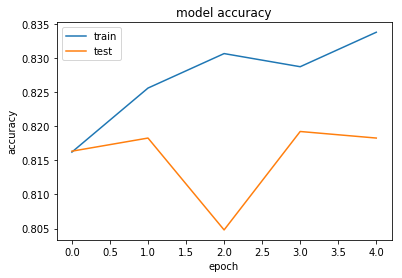

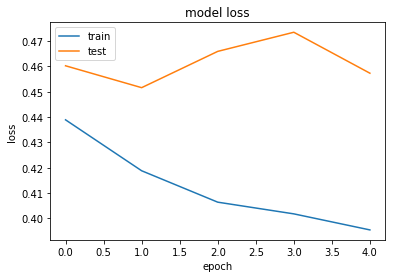

In [8]:
model1 = Sequential()
model1.add(Dense(600, activation='relu', input_shape=(11,)))
model1.add(Dense(500, activation='relu'))
model1.add(Dense(3, activation='softmax'))
model1.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_1 = model1.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=call_back)
plotting(model_1)

# Model 2 : 2 hidden layer

Train on 4157 samples, validate on 1040 samples
Epoch 1/10
3s - loss: 0.4485 - acc: 0.8177 - val_loss: 0.4873 - val_acc: 0.8087
Epoch 2/10
3s - loss: 0.4219 - acc: 0.8239 - val_loss: 0.4357 - val_acc: 0.7952
Epoch 3/10
3s - loss: 0.4101 - acc: 0.8261 - val_loss: 0.4686 - val_acc: 0.8106
Epoch 4/10
3s - loss: 0.3988 - acc: 0.8306 - val_loss: 0.4724 - val_acc: 0.8192
Epoch 5/10
3s - loss: 0.4093 - acc: 0.8343 - val_loss: 0.4757 - val_acc: 0.8135
Epoch 6/10
4s - loss: 0.4106 - acc: 0.8367 - val_loss: 0.4466 - val_acc: 0.8288
Epoch 7/10
3s - loss: 0.4009 - acc: 0.8388 - val_loss: 0.4567 - val_acc: 0.8298
Epoch 8/10
3s - loss: 0.4063 - acc: 0.8405 - val_loss: 0.4651 - val_acc: 0.8250
Epoch 9/10
3s - loss: 0.3983 - acc: 0.8439 - val_loss: 0.4724 - val_acc: 0.8356
Epoch 10/10
4s - loss: 0.3987 - acc: 0.8432 - val_loss: 0.4899 - val_acc: 0.8279
Epoch 00004: early stopping


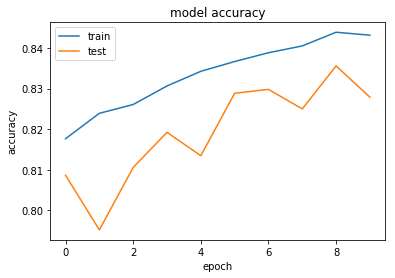

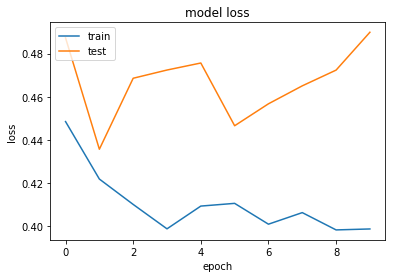

In [9]:
model2 = Sequential()
model2.add(Dense(400, activation='relu', input_shape=(11,)))
model2.add(Dense(600, activation='relu'))
model2.add(Dense(700, activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_2 = model2.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=call_back)
plotting(model_2)

# Model 3 : 3 hidden layers

Train on 4157 samples, validate on 1040 samples
Epoch 1/10
7s - loss: 0.4653 - acc: 0.8071 - val_loss: 0.4674 - val_acc: 0.8087
Epoch 2/10
8s - loss: 0.4305 - acc: 0.8266 - val_loss: 0.4569 - val_acc: 0.8231
Epoch 3/10
7s - loss: 0.4264 - acc: 0.8285 - val_loss: 0.4847 - val_acc: 0.8192
Epoch 4/10
7s - loss: 0.4214 - acc: 0.8333 - val_loss: 0.4816 - val_acc: 0.8125
Epoch 5/10
7s - loss: 0.4159 - acc: 0.8333 - val_loss: 0.4609 - val_acc: 0.8240
Epoch 6/10
7s - loss: 0.4181 - acc: 0.8318 - val_loss: 0.4718 - val_acc: 0.8163
Epoch 00005: early stopping


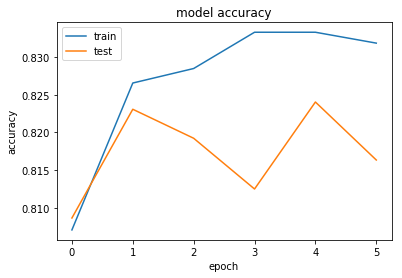

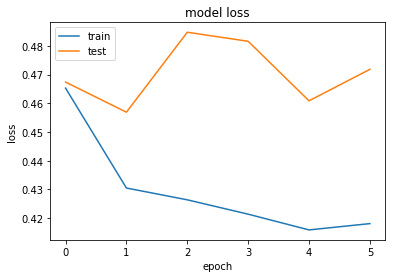

In [10]:
model3 = Sequential()
model3.add(Dense(400, activation='relu', input_shape=(11,)))
model3.add(Dense(600, activation='relu'))
model3.add(Dense(700, activation='relu'))
model3.add(Dense(800, activation='relu'))
model3.add(Dense(3, activation='softmax'))
model3.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_3 = model3.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=call_back)
plotting(model_3)

# Model 4 : 4 hidden layers

Train on 4157 samples, validate on 1040 samples
Epoch 1/10
10s - loss: 0.4784 - acc: 0.8155 - val_loss: 0.4785 - val_acc: 0.8183
Epoch 2/10
10s - loss: 0.4457 - acc: 0.8189 - val_loss: 0.4719 - val_acc: 0.8192
Epoch 3/10
10s - loss: 0.4332 - acc: 0.8217 - val_loss: 0.4469 - val_acc: 0.8192
Epoch 4/10
11s - loss: 0.4255 - acc: 0.8285 - val_loss: 0.4611 - val_acc: 0.8250
Epoch 5/10
11s - loss: 0.4209 - acc: 0.8321 - val_loss: 0.4667 - val_acc: 0.8192
Epoch 00004: early stopping


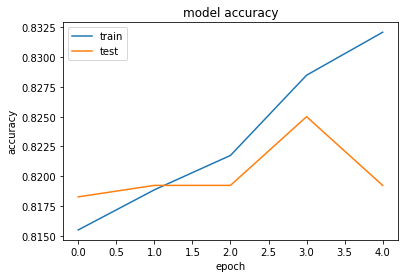

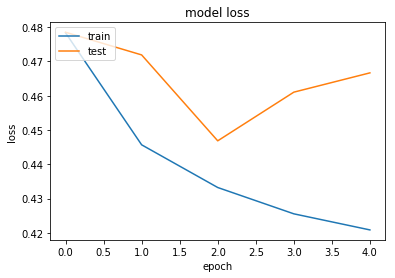

In [11]:
model4 = Sequential()
model4.add(Dense(400, activation='relu', input_shape=(11,)))
model4.add(Dense(600, activation='relu'))
model4.add(Dense(700, activation='relu'))
model4.add(Dense(800, activation='relu'))
model4.add(Dense(800, activation='relu'))
model4.add(Dense(3, activation='softmax'))
model4.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_4 = model4.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=call_back)
plotting(model_4)

# Model 5 : 5 hidden layers

Train on 4157 samples, validate on 1040 samples
Epoch 1/10
16s - loss: 0.4971 - acc: 0.8049 - val_loss: 0.5032 - val_acc: 0.8087
Epoch 2/10
15s - loss: 0.4448 - acc: 0.8217 - val_loss: 0.4713 - val_acc: 0.8115
Epoch 3/10
14s - loss: 0.4357 - acc: 0.8273 - val_loss: 0.4767 - val_acc: 0.8144
Epoch 4/10
13s - loss: 0.4364 - acc: 0.8261 - val_loss: 0.4681 - val_acc: 0.8154
Epoch 5/10
15s - loss: 0.4214 - acc: 0.8355 - val_loss: 0.6867 - val_acc: 0.8067
Epoch 00004: early stopping


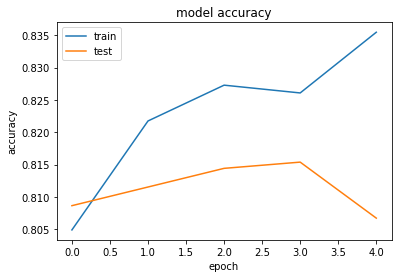

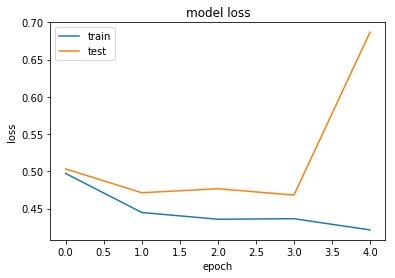

In [12]:
model5 = Sequential()
model5.add(Dense(400, activation='relu', input_shape=(11,)))
model5.add(Dense(600, activation='relu'))
model5.add(Dense(700, activation='relu'))
model5.add(Dense(800, activation='relu'))
model5.add(Dense(800, activation='relu'))
model5.add(Dense(800, activation='relu'))
model5.add(Dense(3, activation='softmax'))
model5.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_5 = model5.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=call_back)
plotting(model_5)